Step 1 : Importing Modules and the image

In [ ]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
! wget https://www.dropbox.com/s/ynvm6v19gfkagbh/Cars387.png?dl=0

--2020-12-10 16:50:46--  https://www.dropbox.com/s/ynvm6v19gfkagbh/Cars387.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ynvm6v19gfkagbh/Cars387.png [following]
--2020-12-10 16:50:46--  https://www.dropbox.com/s/raw/ynvm6v19gfkagbh/Cars387.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc67e3ba17a20fc166917d9c8d21.dl.dropboxusercontent.com/cd/0/inline/BE138uB2BjhbNPCCUFWAN6CQJvC93TtmHZo97kaw-7xuPb-idJSatQLkAOt4ALlXY3khRNx7gI8QToGfGe0gHn4NQu1wZw9lkk-W4RnEmLpSQWSNTvmI7l7jbZXi9JyKtvw/file# [following]
--2020-12-10 16:50:46--  https://uc67e3ba17a20fc166917d9c8d21.dl.dropboxusercontent.com/cd/0/inline/BE138uB2BjhbNPCCUFWAN6CQJvC93TtmHZo97kaw-7xuPb-idJSatQLkAOt4ALlXY3khRNx7gI8QToGfGe0gHn4NQu1wZw9lkk-W4RnEmLpSQW

Step 2 : Reading and plottling the image

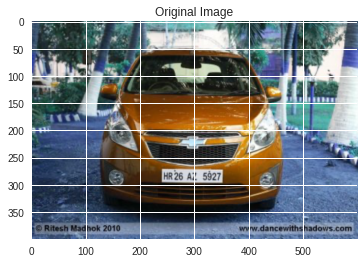

In [ ]:
img = cv2.imread('/content/Cars387.png?dl=0',cv2.IMREAD_COLOR) 
img = cv2.resize(img,(600,400))
plt.imshow(img)
plt.title("Original Image")
plt.show()

Step 3 : Pre Processing 

    1. BGR to Grayscale
    2. Noise Reduction

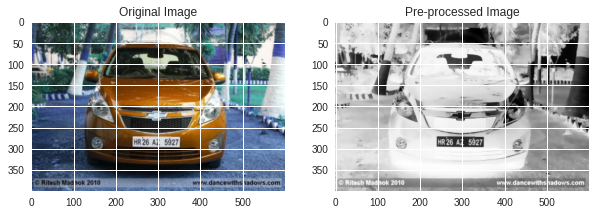

In [ ]:
plt.figure(figsize=(10,10))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray = cv2.bilateralFilter(gray, 13, 15, 15) 
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Pre-processed Image")
plt.imshow(gray)
plt.show()

Step 3 : Edge Detection - Canny Algorithm

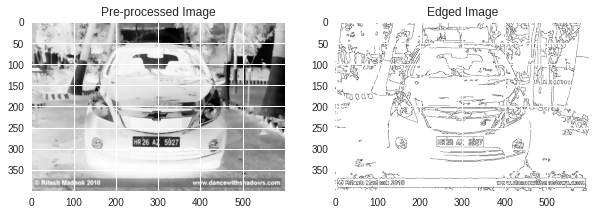

In [ ]:
plt.figure(figsize=(10,10))
edged = cv2.Canny(gray, 30, 200) 
plt.subplot(1,2,1)
plt.title("Pre-processed Image")
plt.imshow(gray)
plt.subplot(1,2,2)
plt.title("Edged Image")
plt.imshow(edged)
plt.show()

Step 4 : Object Shape Detection : Contours Algorithm

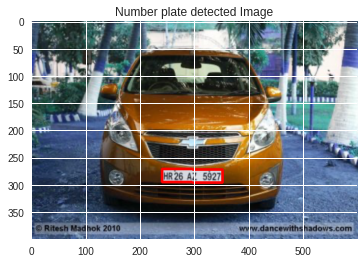

In [ ]:
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    if len(approx) == 4:
        screenCnt = approx
        break
if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1
if detected == 1:
      cv2.drawContours(img, [screenCnt], -1, (255, 0, 0), 3)
plt.title("Number plate detected Image")
plt.imshow(img)
plt.show()

Step 5 : Masking 

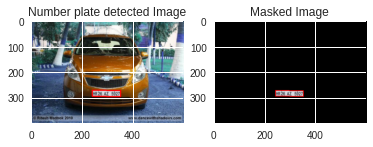

In [ ]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)
plt.subplot(1,2,1)
plt.title("Number plate detected Image")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Masked Image")
plt.imshow(new_image)
plt.show()

Step 6 : Morphological Transformation

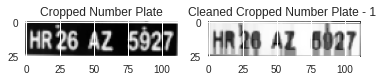

In [ ]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
plt.subplot(1,2,1)
plt.title("Cropped Number Plate")
plt.imshow(Cropped)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,5))
thresh = cv2.morphologyEx(Cropped, cv2.MORPH_OPEN,kernel)
plt.subplot(1,2,2)
plt.title("Cleaned Cropped Number Plate - 1 ")
plt.imshow(thresh,cmap='gray')
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow
print("Cleaned Cropped Number Plate final")
cv2_imshow(Cropped)

Cleaned Cropped Number Plate final


Step 7: Optical Character Recognition

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract
import shutil
import os
import random

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,637 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(Cropped, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
out_below = pytesseract.image_to_string(img)
print("OUTPUT:", out_below[:-1])

OUTPUT: HR26 AZ 5927



Step 8 : Cleaning of Output

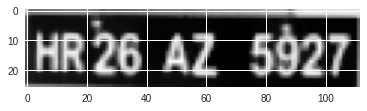

Final output :  HR26AZ5927



In [ ]:
final_out=""
for i in out_below:
  if(i>="a" and i<="z"):
    pass
  elif(i==" "):
    pass
  else:
    final_out+=i
plt.imshow(img)
plt.show()
print("Final output : ", final_out)